<a href="https://colab.research.google.com/github/konkuk-gaegul/3rd-Team-Project/blob/main/%EC%B5%9C%EC%A2%85_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트 목적
- 반려동물 양육인구 증가 및 반려동물의 비만도 문제 제기
    - 농림축산식품부 조사 결과, 반려동물 양육인구는 매년 증가 추세이다.
    - 2019년 기준 26.4% 인구가 반려동물을 양육하는 것으로 나타남
- 동물 복지에 대한 관심 증가
    - 견주로서 책임감을 가지고 반려동물을 건강하게 양육해야 한다.
- 반려동물 개체별 응용 서비스 개발의 필요성
    - 견종별 특성을 반영한 모델 개발 및 정상/비만 판별 모델 개발
    - 각 견종에 맞는 운동법, 식이조절 방법을 추천하는 추천 시스템 개발의 필요성을 느낌

# 프로젝트 업무 분장
- DataScience (안재형, 이민형)
    - 지도학습
        - Pytorch
            - 웰시코기, 리트리버, 닥스훈트
        - Keras
            - 말티즈, 비글, 치와와
- FrontEnd (김소영, 조세익)
    - vue.js
        - components 구성 -> App, footer, header, mymodal
        - views 페이지 구성 -> 로그인, 회원가입, 견종선택, 검사, 결과화면
        - css, router 설정
        - axios, webpack, nginx를 이용하여 서버 배포
- BackEnd (이경희)
    - REST API 설계
    - Django Rest Framework을 이용한 API 개발
    - docker와 nginx를 이용한 AWS EC2 Ubuntu에 서버 배포
- DataEngineering (조경상)
    - AI Hub에서 제공하는 개의 행동 특성 분석 이미지 수집
        - 약 200,000 장 제공
        - 객체(개)만 잘라오는 머신러닝 프로그램 활용

# 이미지 수집
- 소/중/대현견마다 크기가 다르기 때문에 견종별로 모델링
- 팀원 6명 마다 1개 견종을 맡아 이미지 수집
    - 닥스훈트, 리트리버, 말티즈, 비글, 웰시코기, 치와와
    - 견종별로 1,000장 수집 (3일 소요)

## 이미지 수집 조건
- 웹 크롤링을 이용하여 이미지 수집
- 미성견은 비만/정상 판단이 불가하기 때문에 성견만 수집
- B.C.S(Body Condition Score)를 활용, 비만도를 1 ~ 5단계로 나누어 비만 판단
- 정상 이미지, 비만 이미지는 1 : 1 비율을 이루도록 수집

## 1차 수집된 이미지

|구분|닥스훈트|리트리버|말티즈|비글|웰시코기|치와와|총 계|
|------|------|------|------|------|------|------|------|
|정상|700|602|701|859|579|728|4206|
|비만|301|405|267|135|408|200|1748|
|총 계|1001|1007|968|994|987|928|5954|

- 이미지 수집의 한계
    - 네이버, 구글, 다음 등 검색 엔진의 절대적인 수가 적음
    - 일반적으로 비만 개체는 적은 편임
    - 몇몇 크롤링 자료에는 중복된 이미지 존재

## BCS(Body Condition Score)
- ![poster](https://web-wit.s3.ap-northeast-2.amazonaws.com/images/boardPet/220/pet_1616603166_1.jpg)
- 출처 : https://www.witkorea.kr/community/dog/1450

# 레이블링
- 더욱 정확한 서비스 제공을 위해 직접 정상/비만 레이블링
    - 모든 이미지를 수기로 레이블링 진행함 (3일 소요)

# Data Science

## CNN Modeling
- TensorFlow Keras 라이브러리 활용
- 학습을 진행하기 전, 이미지 전처리 필수
    - Resize
        - 모든 이미지가 다른 크기를 갖기 때문
    - Scaling
        - 학습에 용이하게 0 ~ 255 값을 갖는 RGB 색 정보를 255로 나누어 0 ~ 1 사이 값을 갖도록 함
- 이미지 증식 활용
    - 비만견 사진이 절대적으로 부족하여 필수로 진행
    - 좌/우, 상/하 평행이동, 40도 범위 내에서 이미지 회전, 수평/수직 반전
- 훈련, 검증 set 구성
    - train : 50%
    - validation : 25%
    - test : 25%


## Pytorch Modeling
- Transfer Learning (전이학습 방법 채택)
- 이미지 증식 활용
- 리트리버, 닥스훈트, 웰시코기 학습에 적용
    - 이미지 전처리 세트를 약 10개 생성
    - 견종별로 가장 효과적인 세트를 찾는다.
- batch_size, epoch 등 parameter를 다양하게 조절하여 최적의 성능을 구한다.
- 훈련, 테스트 세트 구성
    - train : 75%
    - test : 25%

# Backend

## REST API 설계

1. 로그인
  * CRUD - ID, PW를 데이터를 받아와서 로그인
  * HTTP verbs - POST
  * Route - /dogobesitytest
2. 회원가입
  * CRUD - ID, PW를 입력하여 회원가입 ( 회원생성 )
  * HTTP verbs - POST 
  * Route - signup
3. 예측 결과 도출
  * CRUD -  견종과, 업로드 한 이미지를 받아와서 예측결과 도출
  * HTTP verbs - POST
  * Route - /dogimage
  

## API 개발
- Django Rest Framework을 이용한 API 개발

**초기 페이지 (로그인 페이지)**  
< http://ip주소:8900/dogobesitytest >  
  * POST 요청 ( 로그인 )   
    - 주고 받는 데이터 ( JSON 형식 ) 
      - userid, password   
    - 성공 시  
      - 견종 선택 페이지로 < http://35.76.37.170:80/dogobesitytest/dogimg >  
      - status 200    
    - 실패 시   
      - 다시 초기 페이지로 < http://35.76.37.170:80/dogobesitytest >  
      - status 400  

-

**회원가입 페이지**  
< http://35.76.37.170:80/dogobesitytest/signup >
* POST 요청
	- 주고 받는 데이터 ( JSON 형식 ) 
		- userid, password

  - 성공 시 
    - 로그인을 위해 초기 페이지로 < http://35.76.37.170:80/dogobesitytest >
    - status 201
  - 실패 시
    - 다시 회원가입 페이지로 < http://35.76.37.170:80/dogobesitytest/signup >
    - status 400

-

**견종 선택 & 이미지 업로드 페이지**   
< http://35.76.37.170:80/dogobesitytest/dogimage >
* POST 요청
	- 주고 받는 데이터 ( JSON 형식 ) 
		- userid, dog_breed, image(base64형식으로 변환된 데이터)    

  - 성공시
    - 서버에서 처리 후 JSON 형태로 처리 결과 return 
    - status 200
  - 실패 시
    - 이미지 업로드 페이지로  < http://35.76.37.170:80/dogobesitytest/dogimage >
    - status 400

-

**결과페이지**  < http://35.76.37.170:80/dogobesitytest/testresult >


## 서버 배포
- docker와 nginx를 이용한 AWS EC2 Ubuntu에 서버 배포

* 전체적인 구조    
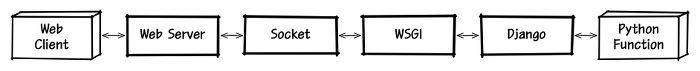
 



- Docker   
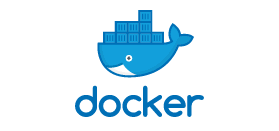 
- Web Server
  - Nginx 사용  
  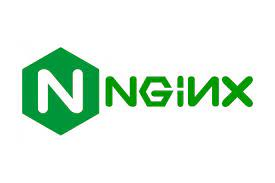
- WSGI
  - uWSGI 사용  
    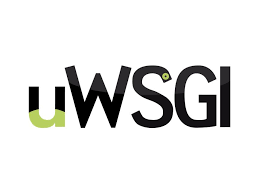

Docker를 사용하여 Nginx와 Django를 각각 이미지화 시킨 후, 이를 동시에 관리하기 위해 docker-commpose를 사용

# Frontend

## vue.js
  - 웹 개발을 단순화하고 정리하기 위해 개발된 대중적인 자바스크립트 프론트엔드 프레임워크

  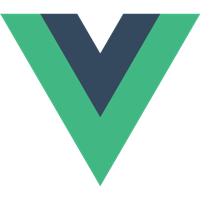

## components 구성
  - App.vue 
    - header, footer를 import 하고 로그인 후 상단에 견종선택, 검사, logout 페이지 선택기능
  - MainHeader.vue
  - MainFooter.vue 

## views 페이지 구성
  - Login.vue(로그인)
    - 메인화면, 로그인 성공 시 견종선택으로 이동,  실패 시 alert
  - SignUp.vue(회원가입)
    - 아이디, 비밀번호, 비밀번호 확인 -> 유효성 확인
    - 회원가입 성공 시 로그인으로 이동 
  - Checkbox.vue(견종선택)
    - checkbox로 견종을 선택하고 검사로 이동
  - Secure.vue(검사)
    - drag & drop 으로 이미지파일 업로드
    - 첨부된 사진은 리스트로 생성, 삭제가능
    - 결과버튼 클릭 시 견종, 이미지 정보를 backend로 전송하고 로딩화면(spinner) 띄운 후 결과로 이동
  - Result.vue(결과)
    - backend에서 받아온 결과 출력
    - 좋아요 버튼
    - sns 공유하기 -> 카톡, 트위터, 페이스북, 링크복사




## css, router 설정
  - css 설정
    - font-face(웹폰트), scss(스타일규칙), keyframes(애니메이션), font awesome(아이콘), modal(로딩 스피너) 외 다양한 효과 사용
  - router 설정
    - vue-router
      - 메인 http://3.113.137.203/dogobesitytest/
      - 회원가입 http://3.113.137.203/dogobesitytest/signup
      - 견종 http://3.113.137.203/dogobesitytest/checkbox
      - 검사 http://3.113.137.203/dogobesitytest/dogimage
      - 결과 http://3.113.137.203/dogobesitytest/testresult

## 서버 배포
  - axios, webpack, nginx를 이용하여 서버 배포
    - axios -> http 서버 통신을 위한 통신 라이브러리

     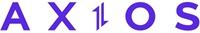

    - webpack loader -> js를 위한 모듈 번들러로 django와 vue.js를 연동

      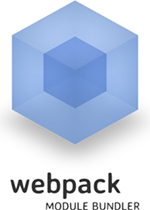

    - nginx -> vue.js로 생성한 웹 프로젝트를 서버로 배포

     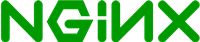

#이미지 전처리
  - aihub
    - 약 200,000장 중 모델링에 활용할 2954장 추가 수집 비만자료는 여전히 부족
  - 정방향 이미지 자르기
    - 코드로 이미지 정방향 자르기 시도

#견종다합치기
  -닥스훈트, 치와와, 비글, 리트리버, 웰시코기, 말티즈 정상 
  
  -닥스훈트, 치와와, 비글, 리트리버, 웰시코기, 말티즈 비만 

# yolov5
  - 약 90%는 코드로 정방향 자르기가 가능 10% 정도는 가외로 몰림
  - 객체 인식을 통한 정방향 이미지 자르기 시도

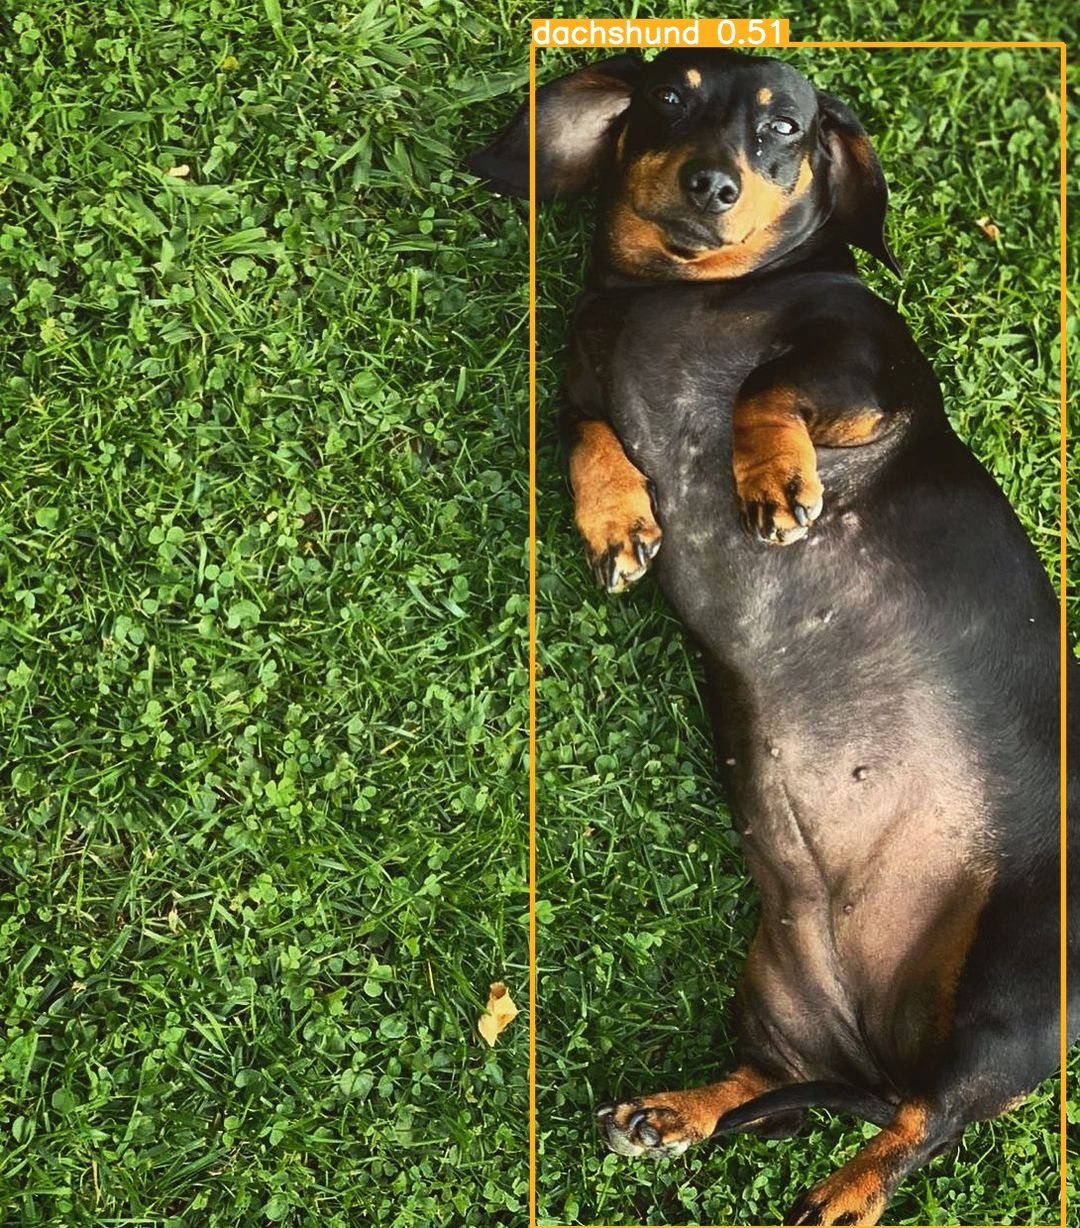

In [ ]:
display.Image(filename='/content/yolov5/runs/detect/exp/026.jpg')

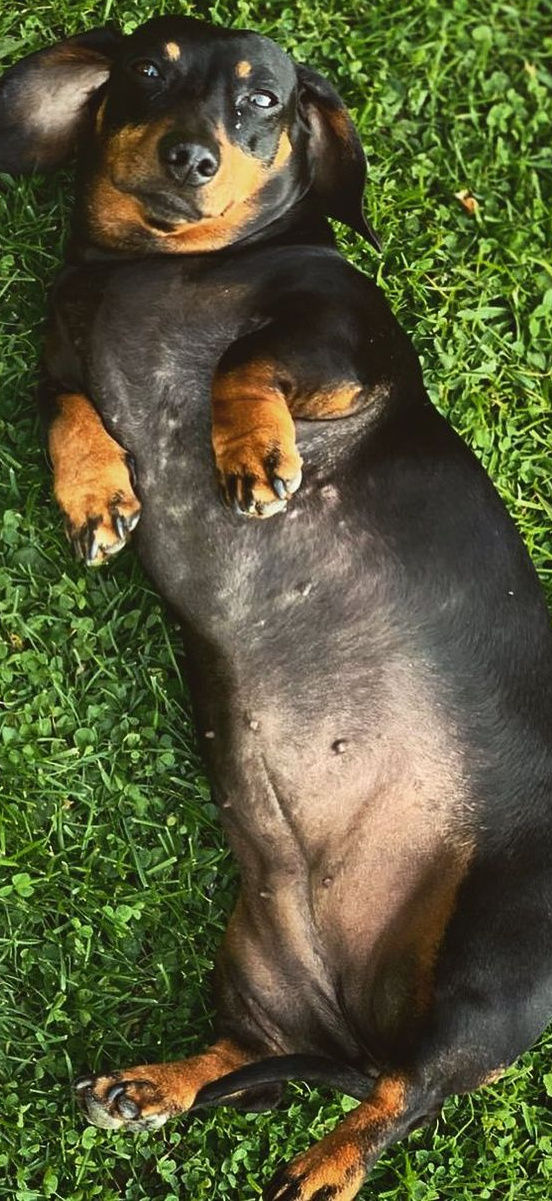

In [ ]:
display.Image(filename='/content/yolov5/runs/detect/exp/crops/dachshund/026.jpg')

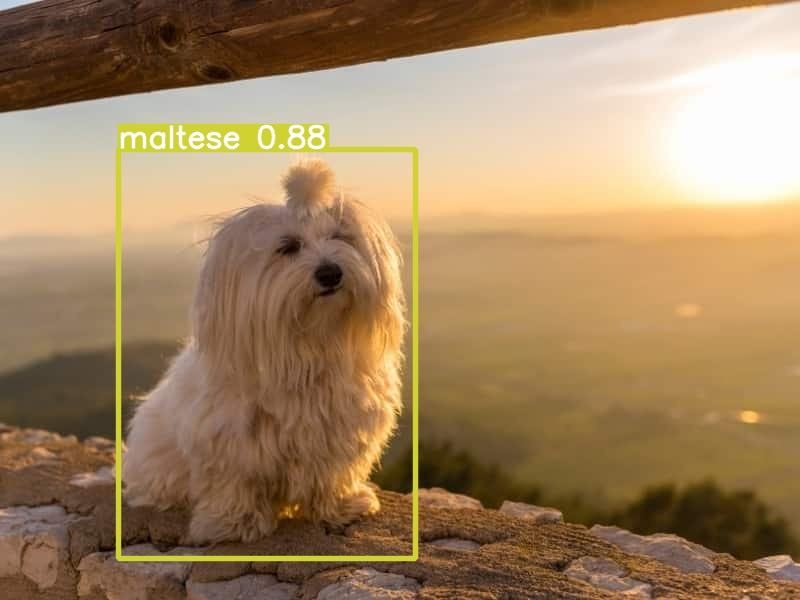

In [ ]:
display.Image(filename='/content/yolov5/runs/detect/exp3/291.jpg')

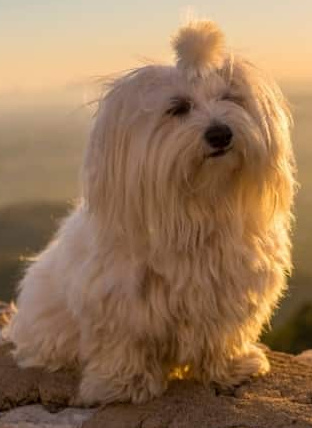

In [ ]:
display.Image(filename='/content/yolov5/runs/detect/exp3/crops/maltese/291.jpg')

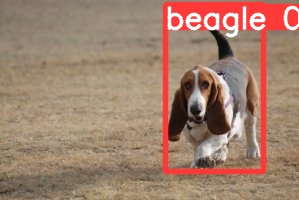

In [ ]:
display.Image(filename='/content/yolov5/runs/detect/exp4/004.jpg')

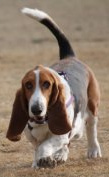

In [ ]:
display.Image(filename='/content/yolov5/runs/detect/exp4/crops/beagle/004.jpg')

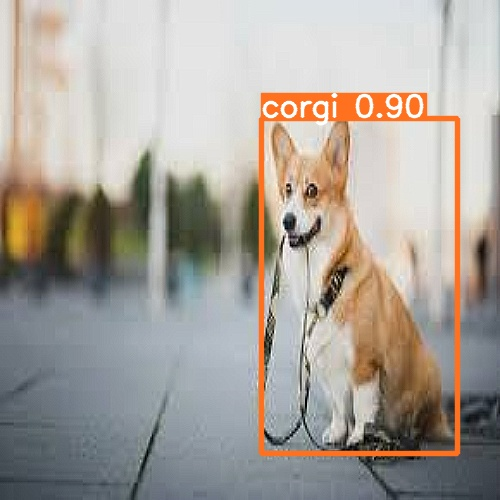

In [ ]:
display.Image(filename='/content/yolov5/runs/detect/exp5/61.jpg')

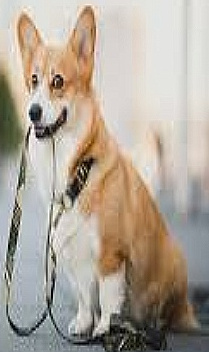

In [ ]:
display.Image(filename='/content/yolov5/runs/detect/exp5/crops/corgi/61.jpg')

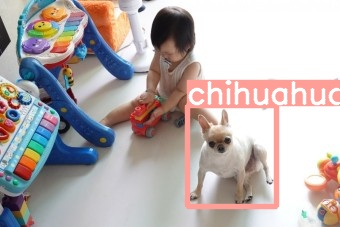

In [ ]:
display.Image(filename='/content/yolov5/runs/detect/exp6/243.jpg')

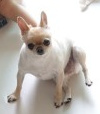

In [ ]:
display.Image(filename='/content/yolov5/runs/detect/exp6/crops/chihuahua/243.jpg')

# roboflow
  -yolov5에 사용할 데이터셋 만들기
  
  -총 5037장 이미지 변환 aihub 추가 이미지 2724장 대기중

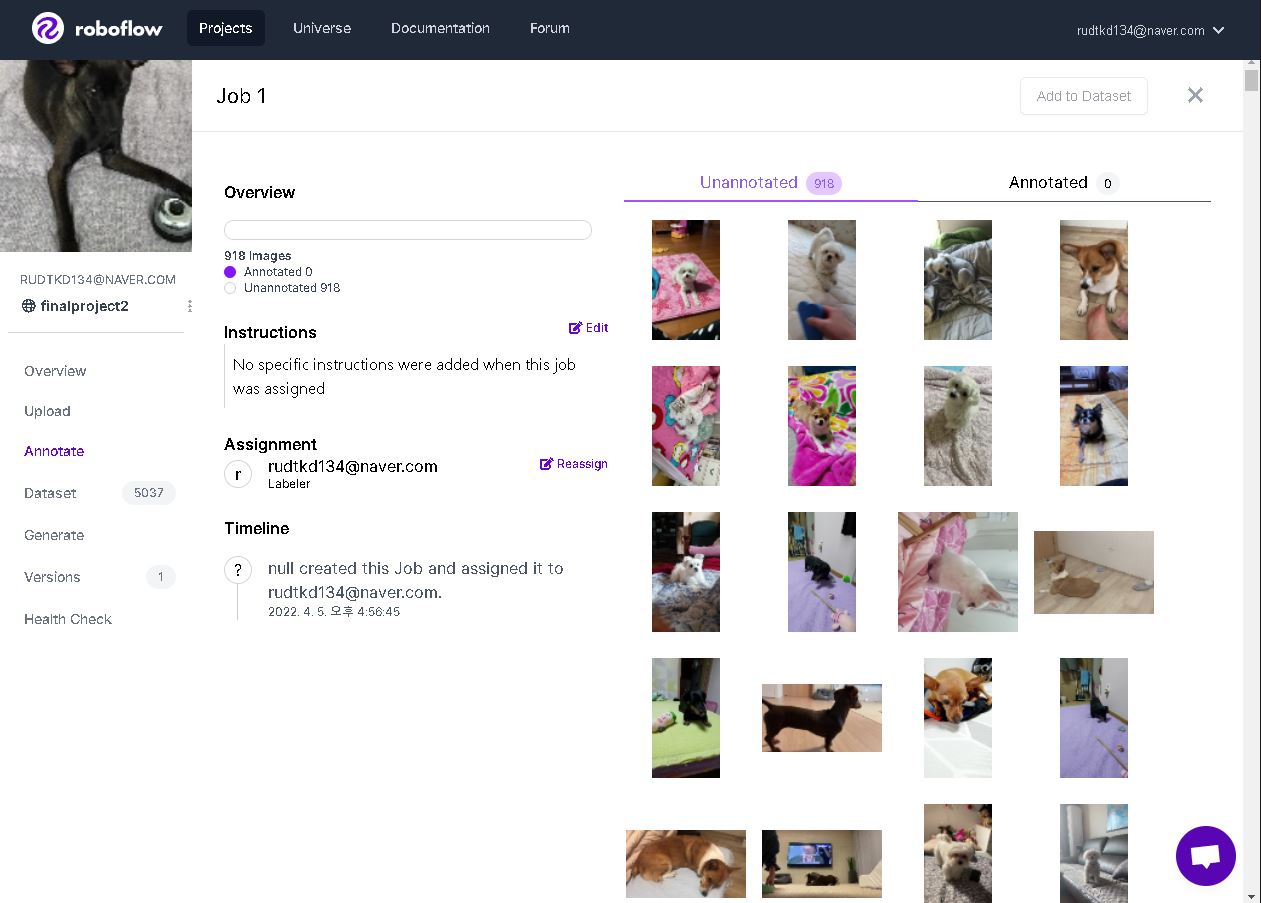

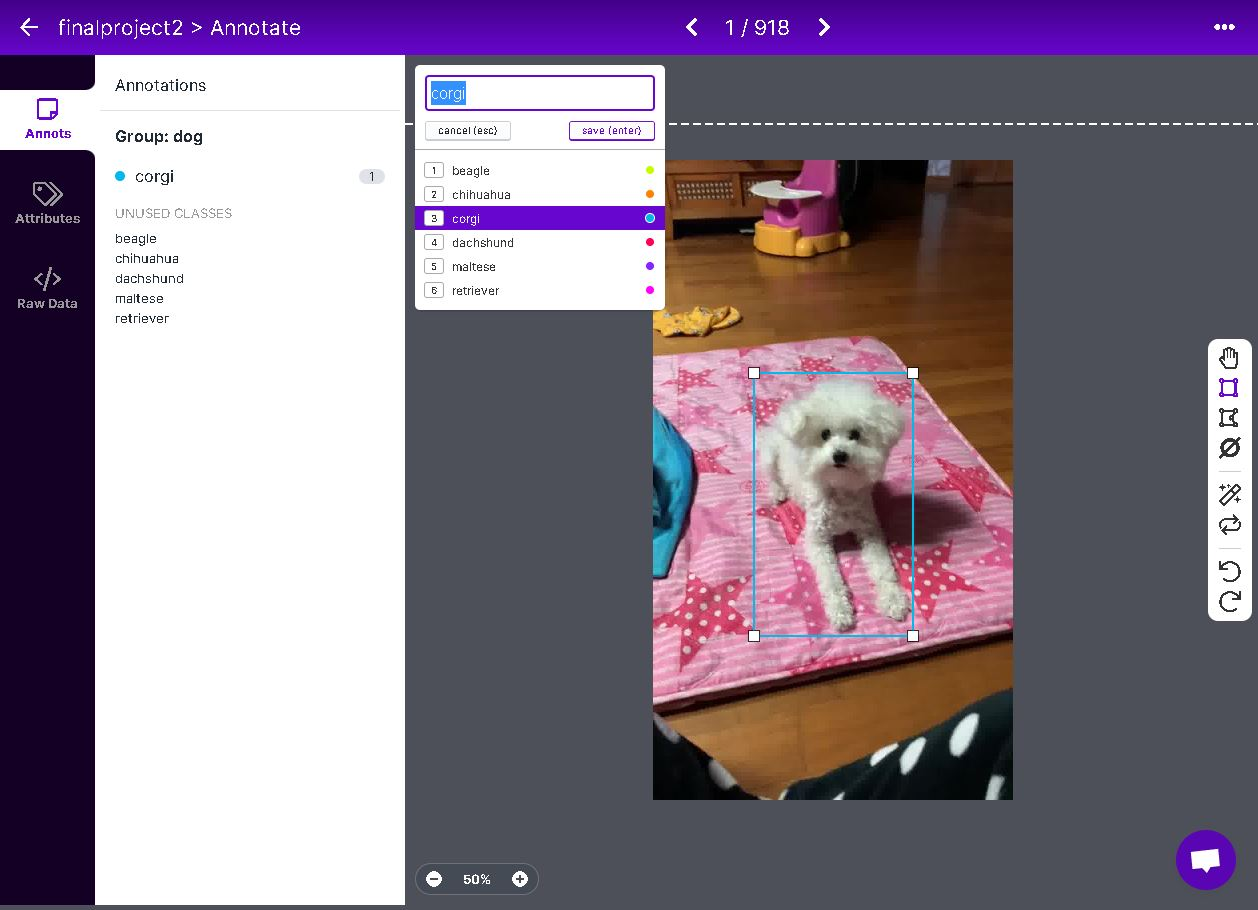